In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=fe08482bee86774450a87e8cd74c1dca542354653e59b8491b4fb42de838a132
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
#create a pyspark session

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
#data import

df=spark.read.csv('/content/sample_data/california_housing_train.csv', header=True)
df.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000| 472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000| 463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000| 117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000| 226.000000|     3.191700|      73400.000000|
|-114.570000|33.570000|         20.000000|1454.000000|    326.000000| 624.000000| 262.000000|     1.925000|    

In [ ]:
#create a temporary sql view

df.createOrReplaceTempView('housing')

In [ ]:
# how to query data
# option 1
# query = """"
# type in your query
# """
# spark.sql(query).show()
# option 2
# spark.sql("type sql query inside the code").show()

In [ ]:
# option 2

spark.sql("select * from housing limit 3").show()

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000|472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000|463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000|117.000000|     1.650900|      85700.000000|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+



In [ ]:
# Option 1

query = """
SELECT total_rooms + total_bedrooms as total_rooms_bedrooms,
population,
population/households as population_per_household,
median_income,
median_house_value
FROM housing
"""

spark.sql(query).show()

+--------------------+-----------+------------------------+-------------+------------------+
|total_rooms_bedrooms| population|population_per_household|median_income|median_house_value|
+--------------------+-----------+------------------------+-------------+------------------+
|              6895.0|1015.000000|      2.1504237288135593|     1.493600|      66900.000000|
|              9551.0|1129.000000|      2.4384449244060473|     1.820000|      80100.000000|
|               894.0| 333.000000|      2.8461538461538463|     1.650900|      85700.000000|
|              1838.0| 515.000000|      2.2787610619469025|     3.191700|      73400.000000|
|              1780.0| 624.000000|       2.381679389312977|     1.925000|      65500.000000|
|              1623.0| 671.000000|       2.807531380753138|     3.343800|      74000.000000|
|              3587.0|1841.000000|      2.9083728278041074|     2.676800|      82400.000000|
|               980.0| 375.000000|      2.3734177215189876|     1.7083

In [ ]:
#prompt: plot the distribution of the  population column from the housing view

spark.sql("SELECT population FROM housing").describe().show()

+-------+------------------+
|summary|        population|
+-------+------------------+
|  count|             17000|
|   mean|1429.5739411764705|
| stddev| 1147.852959159527|
|    min|        100.000000|
|    max|        999.000000|
+-------+------------------+



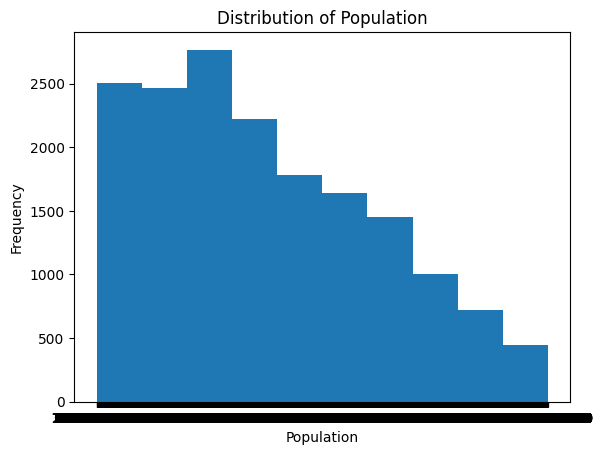

In [ ]:
# Create a pandas dataframe from the Spark DataFrame
pandas_df = spark.sql("SELECT population FROM housing").toPandas()

# Plot the data using matplotlib
import matplotlib.pyplot as plt

plt.hist(pandas_df['population'], bins=10)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Population')
plt.show()

Machine Learning

https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fspark.apache.org%2Fdocs%2Flatest%2Fmllib-linear-methods.html

In [ ]:
# importing ML library
from pyspark.ml.classification import LogisticRegression

# select our data columns
import pyspark.sql.functions as f

data = df.select(f.col('housing_median_age').cast('float').alias('f1'),
          f.col('total_rooms').cast('float').alias('f2'),
          f.col('median_house_value').cast('float').alias('label'))

In [ ]:
# select our data columns
import pyspark.sql.functions as f

data = df.select(f.col('housing_median_age').cast('float').alias('f1'),
          f.col('total_rooms').cast('float').alias('f2'),
          f.col('median_house_value').cast('float').alias('label'))

# create a features vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['f1', 'f2'], outputCol='features')
training = assembler.transform(data)
training.show()

+----+------+-------+-------------+
|  f1|    f2|  label|     features|
+----+------+-------+-------------+
|15.0|5612.0|66900.0|[15.0,5612.0]|
|19.0|7650.0|80100.0|[19.0,7650.0]|
|17.0| 720.0|85700.0| [17.0,720.0]|
|14.0|1501.0|73400.0|[14.0,1501.0]|
|20.0|1454.0|65500.0|[20.0,1454.0]|
|29.0|1387.0|74000.0|[29.0,1387.0]|
|25.0|2907.0|82400.0|[25.0,2907.0]|
|41.0| 812.0|48500.0| [41.0,812.0]|
|34.0|4789.0|58400.0|[34.0,4789.0]|
|46.0|1497.0|48100.0|[46.0,1497.0]|
|16.0|3741.0|86500.0|[16.0,3741.0]|
|21.0|1988.0|62000.0|[21.0,1988.0]|
|48.0|1291.0|48600.0|[48.0,1291.0]|
|31.0|2478.0|70400.0|[31.0,2478.0]|
|15.0|1448.0|45000.0|[15.0,1448.0]|
|17.0|2556.0|69100.0|[17.0,2556.0]|
|28.0|1678.0|94900.0|[28.0,1678.0]|
|21.0|  44.0|25000.0|  [21.0,44.0]|
|17.0|1388.0|44000.0|[17.0,1388.0]|
|17.0|  97.0|27500.0|  [17.0,97.0]|
+----+------+-------+-------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients)) # y = m1x1+...+mnxn+c
print("Intercept: %s" % str(lrModel.intercept)) #

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [1632.1034373657426,10.371075448575159]
Intercept: 133222.48807045983
numIterations: 7
objectiveHistory: [0.5, 0.49235905772267236, 0.48139040339518446, 0.4786458677558125, 0.47784680935123297, 0.4777895943721478, 0.47777895600016845, 0.4777789559997597]
+-------------------+
|          residuals|
+-------------------+
|-149006.51504834974|
| -163471.1805620089|
| -82735.42082865158|
| -98238.92044189153|
|-115444.10052000295|
|-120938.16940124013|
|-121773.79033361137|
|-160060.04226669832|
|-179981.08526412153|
|-175724.74613580102|
|-111634.33632143139|
|-126114.35824690785|
|-176352.51146812603|
| -139117.2195903671|
|-127721.35688048281|
|-118376.71535223557|
|-101424.04891940975|
|-142952.98757487774|
|-131363.29922829976|
|-134474.24082418924|
+-------------------+
only showing top 20 rows

RMSE: 113373.766439
r2: 0.044444


In [ ]:
from pyspark.ml.classification import LogisticRegression

# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']

lr.setThreshold(bestThreshold)

objectiveHistory:
0.5
0.49235905772267236
0.48139040339518446
0.4786458677558125
0.47784680935123297
0.4777895943721478
0.47777895600016845
0.4777789559997597


AttributeError: 'LinearRegressionTrainingSummary' object has no attribute 'roc'